In [214]:
#!pip install graphviz


In [215]:
from graphviz import Digraph

def plot_model_flow_BILSTM_con3cabezas():
    dot = Digraph(comment='Punctuation and Capitalization Model')

    # Fuente global
    dot.attr(fontname='Times New Roman', fontsize='12')
    dot.node_attr.update(fontname='Times New Roman', fontsize='11')

    # Entrada
    dot.node('input', 'Input IDs\n[batch_size, seq_len]', shape='oval', style='filled', fillcolor='white')

    # BERT
    dot.node('bert', 'bert-base-multilingual-cased\n(congelado excepto las últimas 2 layers)',
             style='filled', fillcolor='lightgrey')
    dot.edge('input', 'bert')

    # Proyección
    dot.node('proj', 'Linear Projection\n(768 → 256)', shape='box', style='filled', fillcolor='#b3e6ff')  # celeste
    dot.edge('bert', 'proj')

    # LSTM 1
    dot.node('lstm1', 'BiLSTM Layer 1\n(256 → 512)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('proj', 'lstm1')

    # Atención
    dot.node('attn', 'Multihead (4 cabezas) Attention\n(embed_dim=512)', shape='box', style='filled', fillcolor='#ffcc66')  # dorado
    dot.edge('lstm1', 'attn')

    # LSTM 2
    dot.node('lstm2', 'BiLSTM Layer 2\n(512 → 512)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('attn', 'lstm2')

    # Dropout
    dot.node('drop', 'Dropout (0.3)', shape='box', style='filled', fillcolor='#ffd6e7')  # rosado claro
    dot.edge('lstm2', 'drop')


    # Clasificador puntuación inicio (2 etapas)
    dot.node('punct_start_hidden', 'Punct. Start\nLinear(512→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#add8e6')
    dot.node('punct_start_out', 'Punct. Start\nLinear(256→N_start)', shape='box', style='filled', fillcolor='#87cefa')
    dot.edge('drop', 'punct_start_hidden')
    dot.edge('punct_start_hidden', 'punct_start_out')
    dot.node('out_punct_start', 'Logits Punct Start', shape='oval', style='filled', fillcolor='#87cefa')
    dot.edge('punct_start_out', 'out_punct_start')

    # Clasificador puntuación final (2 etapas)
    dot.node('punct_end_hidden', 'Punct. End\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#b0e0e6')
    dot.node('punct_end_out', 'Punct. End\nLinear(256→N_end)', shape='box', style='filled', fillcolor='#87ceeb')
    dot.edge('drop', 'punct_end_hidden')
    dot.edge('punct_end_hidden', 'punct_end_out')
    dot.node('out_punct_end', 'Logits Punct End', shape='oval', style='filled', fillcolor='#87ceeb')
    dot.edge('punct_end_out', 'out_punct_end')

    # Clasificador capitalización (2 etapas)
    dot.node('cap_hidden', 'Capitalization\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#a8e6a3')
    dot.node('cap_out', 'Capitalization\nLinear(256→N_cap)', shape='box', style='filled', fillcolor='#6fcf97')
    dot.edge('drop', 'cap_hidden')
    dot.edge('cap_hidden', 'cap_out')
    dot.node('out_cap', 'Logits Capitalization', shape='oval', style='filled', fillcolor='#6fcf97')
    dot.edge('cap_out', 'out_cap')

    # Título
    dot.attr(label=r'\n\nArquitectura: BERT + BiLSTM + Atención + Clasificadores', fontsize='16')
    dot.attr(labelloc='t')

    return dot



In [216]:
flow = plot_model_flow_BILSTM_con3cabezas()
flow.render('model_flow_diagram_BILSTMcon3cabezas', format='png', view=True)  # Guarda y abre como imagen PNG


'model_flow_diagram_BILSTMcon3cabezas.png'

In [217]:
from graphviz import Digraph

def plot_model_flow_BILSTM_con2cabezas():
    dot = Digraph(comment='Punctuation and Capitalization Model')

    # Fuente global
    dot.attr(fontname='Times New Roman', fontsize='12')
    dot.node_attr.update(fontname='Times New Roman', fontsize='11')

    # Entrada
    dot.node('input', 'Input IDs\n[batch_size, seq_len]', shape='oval', style='filled', fillcolor='white')

    # BERT
    dot.node('bert', 'bert-base-multilingual-cased\n(congelado excepto las últimas 2 layers)',
             style='filled', fillcolor='lightgrey')
    dot.edge('input', 'bert')

    # Proyección
    dot.node('proj', 'Linear Projection\n(768 → 256)', shape='box', style='filled', fillcolor='#b3e6ff')  # celeste
    dot.edge('bert', 'proj')

    # LSTM 1
    dot.node('lstm1', 'BiLSTM Layer 1\n(256 → 512)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('proj', 'lstm1')

    # Atención
    #dot.node('attn', 'Multihead (4 cabezas) Attention\n(embed_dim=512)', shape='box', style='filled', fillcolor='#ffcc66')  # dorado
    #dot.edge('lstm1', 'attn')

    # LSTM 2
    dot.node('lstm2', 'BiLSTM Layer 2\n(512 → 512)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('lstm1', 'lstm2')

    # Dropout
    dot.node('drop', 'Dropout (0.3)', shape='box', style='filled', fillcolor='#ffd6e7')  # rosado claro
    dot.edge('lstm2', 'drop')


    # Clasificador puntuación
    dot.node('punct_start_hidden', 'Punctuation\nLinear(512→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#add8e6')
    dot.node('punct_start_out', 'Punctuation\nLinear(256→5)', shape='box', style='filled', fillcolor='#87cefa')
    dot.edge('drop', 'punct_start_hidden')
    dot.edge('punct_start_hidden', 'punct_start_out')
    dot.node('out_punct_start', 'Logits Punctuation', shape='oval', style='filled', fillcolor='#87cefa')
    dot.edge('punct_start_out', 'out_punct_start')

    # Clasificador capitalización (2 etapas)
    dot.node('cap_hidden', 'Capitalization\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#a8e6a3')
    dot.node('cap_out', 'Capitalization\nLinear(256→4)', shape='box', style='filled', fillcolor='#6fcf97')
    dot.edge('drop', 'cap_hidden')
    dot.edge('cap_hidden', 'cap_out')
    dot.node('out_cap', 'Logits Capitalization', shape='oval', style='filled', fillcolor='#6fcf97')
    dot.edge('cap_out', 'out_cap')

    # Título
    dot.attr(label=r'\n\nArquitectura: BERT + BiLSTM + Atención + Clasificadores', fontsize='16')
    dot.attr(labelloc='t')

    return dot


In [218]:
flow = plot_model_flow_BILSTM_con2cabezas()
flow.render('model_flow_diagram_BILSTMcon2cabezas', format='png', view=True)  # Guarda y abre como imagen PNG

'model_flow_diagram_BILSTMcon2cabezas.png'

In [219]:
from graphviz import Digraph

def plot_model_flow_unidirec_3():
    dot = Digraph(comment='Punctuation and Capitalization Model')

    # Fuente global
    dot.attr(fontname='Times New Roman', fontsize='12')
    dot.node_attr.update(fontname='Times New Roman', fontsize='11')

    # Entrada
    dot.node('input', 'Input IDs\n[batch_size, seq_len]', shape='oval', style='filled', fillcolor='white')

    # BERT
    dot.node('bert', 'bert-base-multilingual-cased\n(congelado excepto las últimas 2 layers)', style='filled', fillcolor='lightgrey')
    dot.edge('input', 'bert')

    # Proyección
    dot.node('proj', 'Linear Projection\n(768 → 256)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('bert', 'proj')

    # LSTM 1
    dot.node('lstm', 'LSTM\n2 capas, no bidireccional\n(256 → 256)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('proj', 'lstm')

    # Dropout
    dot.node('drop', 'Dropout (0.3)', shape='box', style='filled', fillcolor='#ffd6e7')
    dot.edge('lstm', 'drop')

    # Clasificador puntuación inicio (2 etapas)
    dot.node('punct_start_hidden', 'Punct. Start\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#add8e6')
    dot.node('punct_start_out', 'Punct. Start\nLinear(256→N_start)', shape='box', style='filled', fillcolor='#87cefa')
    dot.edge('drop', 'punct_start_hidden')
    dot.edge('punct_start_hidden', 'punct_start_out')
    dot.node('out_punct_start', 'Logits Punct Start', shape='oval', style='filled', fillcolor='#87cefa')
    dot.edge('punct_start_out', 'out_punct_start')

    # Clasificador puntuación final (2 etapas)
    dot.node('punct_end_hidden', 'Punct. End\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#b0e0e6')
    dot.node('punct_end_out', 'Punct. End\nLinear(256→N_end)', shape='box', style='filled', fillcolor='#87ceeb')
    dot.edge('drop', 'punct_end_hidden')
    dot.edge('punct_end_hidden', 'punct_end_out')
    dot.node('out_punct_end', 'Logits Punct End', shape='oval', style='filled', fillcolor='#87ceeb')
    dot.edge('punct_end_out', 'out_punct_end')

    # Clasificador capitalización (2 etapas)
    dot.node('cap_hidden', 'Capitalization\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#a8e6a3')
    dot.node('cap_out', 'Capitalization\nLinear(256→N_cap)', shape='box', style='filled', fillcolor='#6fcf97')
    dot.edge('drop', 'cap_hidden')
    dot.edge('cap_hidden', 'cap_out')
    dot.node('out_cap', 'Logits Capitalization', shape='oval', style='filled', fillcolor='#6fcf97')
    dot.edge('cap_out', 'out_cap')

    # Título
    dot.attr(label=r'\n\nArquitectura: BERT + LSTM + Dropout + Clasificadores', fontsize='16')
    dot.attr(labelloc='t')

    return dot


In [220]:
flow = plot_model_flow_unidirec_3()
flow.render('model_flow_diagram_unidirec', format='png', view=True)  # Guarda y abre como imagen PNG

'model_flow_diagram_unidirec.png'

In [221]:
from graphviz import Digraph

def plot_model_flow_unidirec_doscab():
    dot = Digraph(comment='Punctuation and Capitalization Model')

    # Fuente global
    dot.attr(fontname='Times New Roman', fontsize='12')
    dot.node_attr.update(fontname='Times New Roman', fontsize='11')

    # Entrada
    dot.node('input', 'Input IDs\n[batch_size, seq_len]', shape='oval', style='filled', fillcolor='white')

    # BERT
    dot.node('bert', 'bert-base-multilingual-cased\n(congelado excepto las últimas 2 layers)', style='filled', fillcolor='lightgrey')
    dot.edge('input', 'bert')

    # Proyección
    dot.node('proj', 'Linear Projection\n(768 → 256)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('bert', 'proj')

    # LSTM 1
    dot.node('lstm1', 'LSTM\nno bidireccional\n(256 → 256)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('proj', 'lstm1')

    # LSTM 2
    dot.node('lstm', 'LSTM\nno bidireccional\n(256 → 256)', shape='box', style='filled', fillcolor='#b3e6ff')
    dot.edge('lstm1', 'lstm')

    # Dropout
    dot.node('drop', 'Dropout (0.3)', shape='box', style='filled', fillcolor='#ffd6e7')
    dot.edge('lstm', 'drop')

    # Clasificador puntuación inicio (2 etapas)
    dot.node('punct_start_hidden', 'Punctuation\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#add8e6')
    dot.node('punct_start_out', 'Punctuation\nLinear(256→5)', shape='box', style='filled', fillcolor='#87cefa')
    dot.edge('drop', 'punct_start_hidden')
    dot.edge('punct_start_hidden', 'punct_start_out')
    dot.node('out_punct_start', 'Logits Punctuation', shape='oval', style='filled', fillcolor='#87cefa')
    dot.edge('punct_start_out', 'out_punct_start')


    # Clasificador capitalización (2 etapas)
    dot.node('cap_hidden', 'Capitalization\nLinear(256→256)\n+ ReLU + Dropout', shape='box', style='filled', fillcolor='#a8e6a3')
    dot.node('cap_out', 'Capitalization\nLinear(256→4)', shape='box', style='filled', fillcolor='#6fcf97')
    dot.edge('drop', 'cap_hidden')
    dot.edge('cap_hidden', 'cap_out')
    dot.node('out_cap', 'Logits Capitalization', shape='oval', style='filled', fillcolor='#6fcf97')
    dot.edge('cap_out', 'out_cap')

    # Título
    dot.attr(label=r'\n\nArquitectura: BERT + LSTM + Dropout + Clasificadores', fontsize='16')
    dot.attr(labelloc='t')

    return dot

In [222]:
flow = plot_model_flow_unidirec_doscab()
flow.render('model_flow_diagram_unidirec_doscab', format='png', view=True)  # Guarda y abre como imagen PNG

'model_flow_diagram_unidirec_doscab.png'

# Metricas

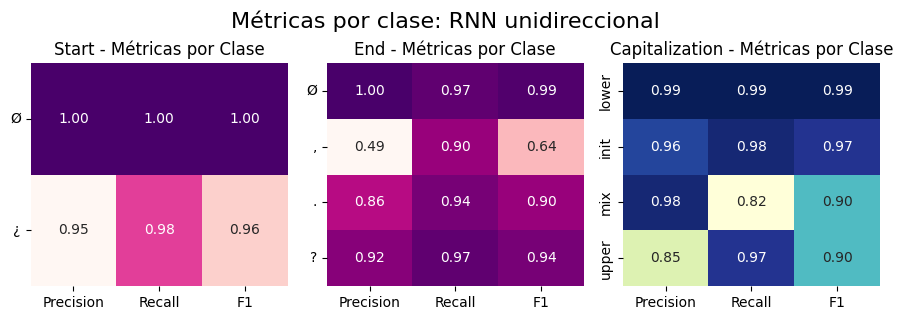

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos
start_data = {
    'Ø':      [1.00, 1.00, 1.00],
    '¿':      [0.95, 0.98, 0.96]
}

end_data = {
    'Ø':      [1.00, 0.97, 0.99],
    ',':      [0.49, 0.90, 0.64],
    '.':      [0.86, 0.94, 0.90],
    '?':      [0.92, 0.97, 0.94]
}

cap_data = {
    'lower':  [0.99, 0.99, 0.99],
    'init':   [0.96, 0.98, 0.97],
    'mix':    [0.98, 0.82, 0.90],
    'upper':  [0.85, 0.97, 0.90]
}

# Convertir a DataFrames
df_start = pd.DataFrame(start_data, index=['Precision', 'Recall', 'F1']).T
df_end   = pd.DataFrame(end_data, index=['Precision', 'Recall', 'F1']).T
df_cap   = pd.DataFrame(cap_data, index=['Precision', 'Recall', 'F1']).T

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Heatmap Start
sns.heatmap(df_start, annot=True, cmap='RdPu', fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_title('Start - Métricas por Clase')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Heatmap End
sns.heatmap(df_end, annot=True, cmap='RdPu', fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_title('End - Métricas por Clase')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

# Heatmap Cap
sns.heatmap(df_cap, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False, ax=axes[2])
axes[2].set_title('Capitalization - Métricas por Clase')

# Layout
plt.tight_layout()
plt.suptitle('Métricas por clase: RNN unidireccional', fontsize=16, y=1.05)
plt.show()


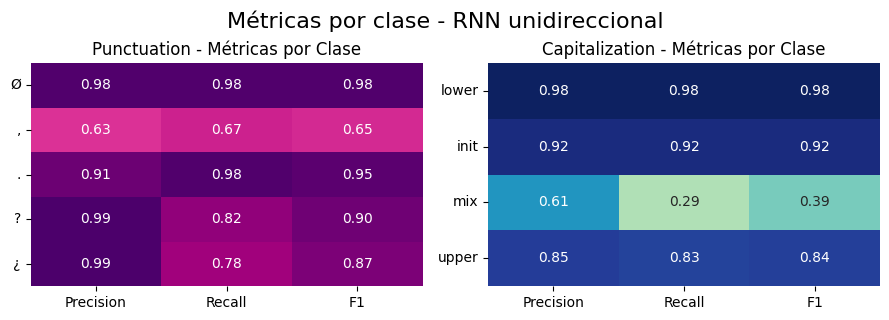

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


punctuation_data = {
    'Ø':   [0.98, 0.98, 0.98],
    ',':   [0.63, 0.67, 0.65],
    '.':   [0.91, 0.98, 0.95],
    '?':   [0.99, 0.82, 0.90],
    '¿':   [0.99, 0.78, 0.87]
}



capitalization_data = {
    'lower': [0.98, 0.98, 0.98],
    'init':  [0.92, 0.92, 0.92],
    'mix':   [0.61, 0.29, 0.39],
    'upper': [0.85, 0.83, 0.84]
}

# Convertir a DataFrames
df_punct = pd.DataFrame(punctuation_data, index=['Precision', 'Recall', 'F1']).T
df_cap   = pd.DataFrame(capitalization_data, index=['Precision', 'Recall', 'F1']).T

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Heatmap Punctuation
sns.heatmap(df_punct, annot=True, cmap='RdPu', fmt=".2f", cbar=False,
            vmin=0, vmax=1, ax=axes[0])
axes[0].set_title('Punctuation - Métricas por Clase')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Heatmap Capitalization
sns.heatmap(df_cap, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False,
            vmin=0, vmax=1, ax=axes[1])
axes[1].set_title('Capitalization - Métricas por Clase')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

# Layout
plt.tight_layout()
plt.suptitle('Métricas por clase - RNN unidireccional', fontsize=16, y=1.05)
plt.show()


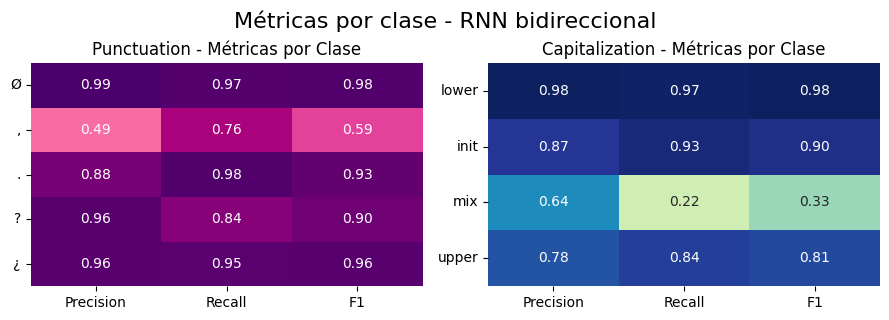

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos del classification report (solo por clase, sin promedios ni accuracy general)
punctuation_data = {
    'Ø':   [0.99, 0.97, 0.98],
    ',':   [0.49, 0.76, 0.59],
    '.':   [0.88, 0.98, 0.93],
    '?':   [0.96, 0.84, 0.90],
    '¿':   [0.96, 0.95, 0.96]
}

capitalization_data = {
    'lower': [0.98, 0.97, 0.98],
    'init':  [0.87, 0.93, 0.90],
    'mix':   [0.64, 0.22, 0.33],
    'upper': [0.78, 0.84, 0.81]
}

# Convertir a DataFrames
df_punct = pd.DataFrame(punctuation_data, index=['Precision', 'Recall', 'F1']).T
df_cap   = pd.DataFrame(capitalization_data, index=['Precision', 'Recall', 'F1']).T

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Heatmap Punctuation
sns.heatmap(df_punct, annot=True, cmap='RdPu', fmt=".2f", cbar=False,
            vmin=0, vmax=1, ax=axes[0])
axes[0].set_title('Punctuation - Métricas por Clase')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Heatmap Capitalization
sns.heatmap(df_cap, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False,
            vmin=0, vmax=1, ax=axes[1])
axes[1].set_title('Capitalization - Métricas por Clase')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

# Layout
plt.tight_layout()
plt.suptitle('Métricas por clase - RNN bidireccional', fontsize=16, y=1.05)
plt.show()


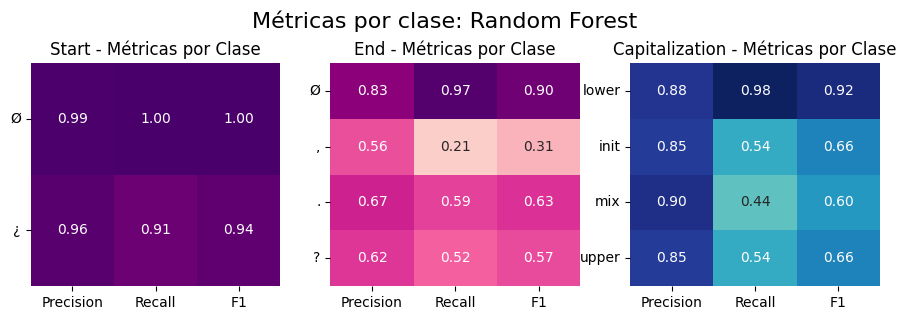

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Etiquetas legibles
cap_labels = {0: "lower", 1: "init", 2: "mix", 3: "upper"}
punct_labels = {0: "Ø", 1: ",", 2: ".", 3: "?", 4: "¿"}

# Datos manualmente extraídos
capitalization_data = {
    0: [0.88, 0.98, 0.92],
    1: [0.85, 0.54, 0.66],
    2: [0.90, 0.44, 0.60],
    3: [0.85, 0.54, 0.66]
}

ending_punct_data = {
    0: [0.83, 0.97, 0.90],
    1: [0.56, 0.21, 0.31],
    2: [0.67, 0.59, 0.63],
    3: [0.62, 0.52, 0.57]
}

starting_punct_data = {
    0: [0.99, 1.00, 1.00],
    4: [0.96, 0.91, 0.94]
}

# Reemplazar índices por etiquetas legibles
df_cap = pd.DataFrame(capitalization_data, index=["Precision", "Recall", "F1"]).T.rename(index=cap_labels)
df_end = pd.DataFrame(ending_punct_data, index=["Precision", "Recall", "F1"]).T.rename(index=punct_labels)
df_start = pd.DataFrame(starting_punct_data, index=["Precision", "Recall", "F1"]).T.rename(index=punct_labels)

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Ending punctuation
sns.heatmap(df_end, annot=True, cmap='RdPu', fmt=".2f", cbar=False,
            vmin=0, vmax=1, ax=axes[1])
axes[1].set_title("End - Métricas por Clase")
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

# Starting punctuation
sns.heatmap(df_start, annot=True, cmap='RdPu', fmt=".2f", cbar=False,
            vmin=0, vmax=1, ax=axes[0])
axes[0].set_title("Start - Métricas por Clase")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Capitalization
sns.heatmap(df_cap, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False,
            vmin=0, vmax=1, ax=axes[2])
axes[2].set_title("Capitalization - Métricas por Clase")
axes[2].set_yticklabels(axes[2].get_yticklabels(), rotation=0)


plt.tight_layout()
plt.suptitle("Métricas por clase: Random Forest", fontsize=16, y=1.05)
fig.subplots_adjust(wspace=0.2)  # Aumentá este valor para más separación
plt.show()
